# Ch12 의사 결정 나무 

## 1) 결정 트리 소개 

**결정 트리 용어**

**루트 노드** - 부모 노드로 알려짐. 데이터셋의 길이와 모든 가지가 여기서 출발 함.

**브랜치** - 가지는 루트 노드의 서브 노드로 나눈다. 물론 데이터도 나눔 

**결정 노드** - 결정노드들은 서브노드를 더 깊게 나눔. 더 이상 나눌 것이 없으며 리프노느임. 

**리프노드**:  더이상 나눌수 없는 노드. 

**알고리즘** - '지니'(Gini)는 경제학에서 불평등 지수를 나타냄. 0이 가장 평등하며, 1이 불평등하다. 
- 즉, 데이터가 다양한 값을 가질 경우 평등(0)하며 
- 특정 값으로 쏠릴경우 불평등(1에 가까움)
       

    
- 엔트로피는 무질서도를 나타내며, 무질서도(혼잡도)는 서로 다른 값이 섞여 있으면 높다. 
- 혼잡도가 높으면 1, 적으면 0

<img src="./input/gini.png" alt="Drwaing" style="width: 500px;"/>

## (예) 결정트리 : 타이타닉 생존자 예측 

<img src="./input/tree.png" alt="Drwaing" style="width: 3500px;"/>

## 2) 결정나무 해보기 

### 사용 데이터 설명 및 문제 설명

- 데이터는 60명이 학생이 있고,
- 성별 (M/F), 반 (IX/X), 키 (5/6 피트) 즉 150과 180cm, 몸무게 (50/58)
- 이중 30명은 방과후에 축구를 한다. 
- 풀어햐 할 문제는 방과후에 누가 축구를 하는지 예측하라!


In [22]:
import numpy as np
import pandas as pd

In [44]:
label = ['P', 'NP', 'P','NP', 'NP', 'NP', 'P','NP', 'NP', 'NP', 'NP','NP', 'P', 'NP', 'P','NP', 'P', 'NP', 'P','NP', 'P', 'NP', 'P','NP','P', 'NP', 'NP','NP', 'P', 'NP', 'P', 'NP', 'P','NP', 'P', 'NP', 'NP','NP', 'P', 'NP', 'P','NP',  'P', 'NP', 'NP','P', 'P', 'P', 'P','P', 'P', 'NP', 'P','NP','P', 'NP', 'P','NP', 'P', 'NP']

sex = ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F','M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F']

cls = ['IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'IX', 'X', 'IX', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'IX', 'IX', 'IX', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'IX', 'IX', 'IX', 'X', 'IX', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'IX']

height = [5, 6, 5, 6, 5, 6, 5, 6,5, 6, 5, 6,6,6, 5, 5, 6, 5, 6, 5, 6, 5, 6,5, 6, 5, 6,6,6, 5,5, 6, 5, 6, 5, 6, 5, 6,5, 6, 5, 6,6,6, 5,5, 6, 5, 6, 5, 6, 5, 6,5, 6, 5, 6,6,6, 5]

weight = [50, 58, 50, 58, 50, 58, 50, 58, 50, 58, 50, 58, 50, 58, 50, 58, 50, 58, 50, 58,50, 58, 50, 58, 50, 58, 50, 58, 50, 58,50, 58, 50, 58, 50, 58, 50, 58, 50, 58,50, 58, 50, 58, 50, 58, 50, 58, 50, 58,50, 58, 50, 58, 50, 58, 50, 58, 50, 58]

In [45]:
# Data frame created using the above list
df = pd.DataFrame({'Weight': weight, 'Height': height, 
                   'Class': cls, 'Sex': sex, 'label': label})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  60 non-null     int64 
 1   Height  60 non-null     int64 
 2   Class   60 non-null     object
 3   Sex     60 non-null     object
 4   label   60 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.5+ KB


In [25]:
df.head() 

,Weight,Height,Class,Sex,label
0,50,5,IX,M,P
1,58,6,IX,M,NP
2,50,5,IX,M,P
3,58,6,IX,M,NP
4,50,5,IX,M,NP


- 카테로리컬한 데이터를 숫자로 바꾸어라.
- 축구하면 (P=1), 안하면(NP)를 0
- new_label 변수로 1이면 방과후에 축구를 한 것

In [26]:
code = {'P': 1, 'NP': 0}
df['new_label'] = df['label'].map(code) 

In [27]:
new_s = pd.get_dummies(df.Sex)
new_c = pd.get_dummies(df.Class)
df[new_s.columns] = new_s
df[new_c.columns] = new_c

#### df.get_dummies는 카타로그 데이터를 0과 1 값 만듬

In [28]:
df.head()

,Weight,Height,Class,Sex,label,new_label,F,M,IX,X
0,50,5,IX,M,P,1,0,1,1,0
1,58,6,IX,M,NP,0,0,1,1,0
2,50,5,IX,M,P,1,0,1,1,0
3,58,6,IX,M,NP,0,0,1,1,0
4,50,5,IX,M,NP,0,0,1,1,0


In [29]:
new_df = df[['F', 'M', 'IX', 'X', 'Weight', 'Height','new_label']]
new_df.head()

,F,M,IX,X,Weight,Height,new_label
0,0,1,1,0,50,5,1
1,0,1,1,0,58,6,0
2,0,1,1,0,50,5,1
3,0,1,1,0,58,6,0
4,0,1,1,0,50,5,0


#### 사이킷런의 의사결정분류 라이브러리를 이용하여 적용해보자

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 23)
feature = new_df.drop(['new_label'], axis = 1)
label = new_df.new_label
model.fit(feature, label) 

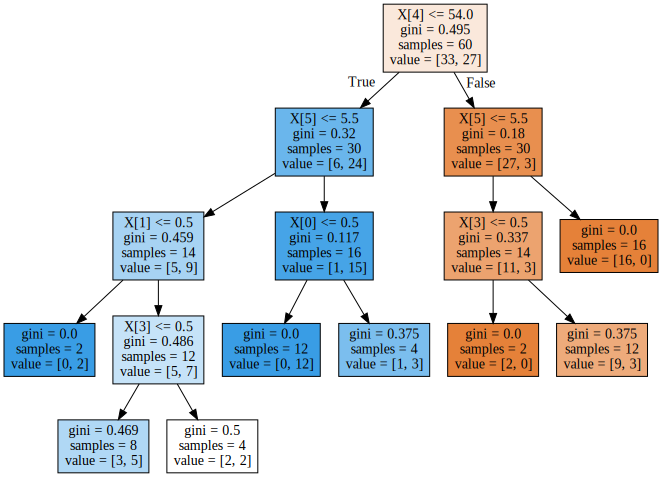

In [32]:
import graphviz
graph = tree.export_graphviz(model, out_file=None, filled=True)
graphviz.Source(graph) 

#### Important Parameters

중요 변수의 이해 

**criterion**:  지니 혹은 엔트로피 알고리즘 선택 'Gini' 혹은 'Entropy'.

**max_depth**: 위의 예제의 경우 4이다. 이 숫자가 크면 오퍼피팅 될 수 있다. 

**max_features**: 최적의 분할을 고려할때 초대 피처 개수, 
- 디폰트는 None으로 테이터 셋트를 사용하여 분할 수행  

**max_lead_nodes**: 말단 리프 노드의 최대 갯수 

**min_samples_leaf**: 말단 노드인 리프노드가 되기 위한 최소한의 샘플 데이터 수 

**min_samples_split**: 노드를 분할 하기 위한 최소한의 샘플 데이터의 수. 
- 과적합을 제어에 도움이 됨 
- 디폴트는 2이고, 작게 설정할 수록 분할 노드가 많아져서 과적함 증가 

#### **min_samples_leaf**

##### 연습문제 min_samples_leaf 개수를 5로 했을때 차이점을 논의하시오

In [47]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(min_samples_leaf = 5, 
                    random_state = 23)
model1.fit(feature, label) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

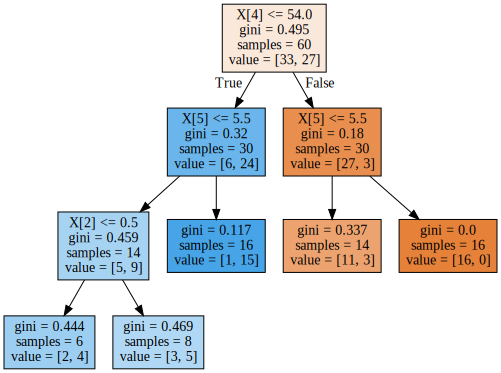

In [48]:
import graphviz
graph1 = tree.export_graphviz(model1, out_file=None, filled=True)
graphviz.Source(graph1) 
# Did you see the change in the tree structure. Now, lets try some other parameters and see how does it affect the tree structure.

# min_samples_split

In [36]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(min_samples_split =16, random_state = 23)
model2.fit(feature, label) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

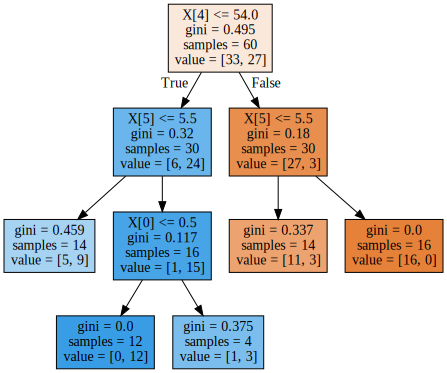

In [37]:
import graphviz
graph2 = tree.export_graphviz(model2, out_file=None, filled=True)
graphviz.Source(graph2) 

#### 연습문제 2. 그리드 서치를 통해 최적의 파라미터를 찾아라 

#### Grid Search CV

In [49]:
from sklearn.model_selection import GridSearchCV
param1 = {'min_samples_leaf': [2,3,4,5],
         'min_samples_split': [2,3,5,10,12,14],
         'max_depth': [2,3,4,5,6],
         'criterion': ['gini', 'entropy'],'max_features':[2,3,4]}
CV = GridSearchCV(model, param1)
CV.fit(feature, label)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=23,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [50]:
best = CV.best_estimator_
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23, splitter='best')

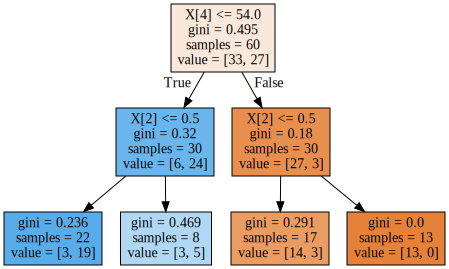

In [40]:
graphCV = tree.export_graphviz(best, filled=True, out_file=None)
graphviz.Source(graphCV)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

accuracy_score(best.predict(feature), label)

0.85

In [42]:
cross_val_score(best, feature, label, cv=5)

array([0.83333333, 0.91666667, 0.91666667, 0.66666667, 0.91666667])

##### 소결) 정확도 85%는 꾀 좋은 성적이고 교차 검증 성적도 좋다